In [ ]:
#%matplotlib nbagg
import numpy as np
# import matplotlib
# matplotlib.use('Tkagg')
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)
import scipy as sp

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [16]:
adata = sc.read('./write/Deng_outer_processed.h5ad')

In [656]:
adata.obs.Genotype = [x.split('-')[0] for x in adata.obs.Genotype]

In [896]:
adata0 = adata.copy()

In [1035]:
adata0.obs['CT_rough'] = [x.split('-')[0] for x in adata0.obs.CTv1]

In [1036]:
adata0.obs['CT_rough'].astype('category').cat.categories

Index(['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell'],
      dtype='object')

In [1015]:
cat_CTv1 = adata0.obs['CTv1'].astype('category').cat.categories

In [8]:
import seaborn as sns

unique_items = ['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell']  # Example unique items
replicates_per_item = replicates_per_item = [2,4,3,2,1,3,1,4,3]  # Different number of replicates for each item

# Generate a color palette for the unique items
base_palette = sns.color_palette()

import colorsys

def adjust_color_hls(color, factor=0.05):
    """Adjust the lightness of a color."""
    h, l, s = colorsys.rgb_to_hls(*color[:3])
    l = max(min(l - factor, 1.0), 0.0)
    return colorsys.hls_to_rgb(h, l, s)

palette_with_replicates = []
for base_color, num_replicates in zip(base_palette, replicates_per_item):
    # Generate colors for each replicate
    for i in range(num_replicates):
        # Alternate the direction of lightness adjustment for variety
        factor = 0.08*(i+1)
        replicate_color = adjust_color_hls(base_color, factor=factor)
        palette_with_replicates.append(replicate_color)
        

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
ys = [x + i for i in range(sum(replicates_per_item))]

for y, color in zip(ys, palette_with_replicates):
    plt.plot(x, y, color=color)

plt.show()


In [ ]:
palette_with_replicates

In [10]:
adata0.uns['CTv1_colors']

array(['#196091', '#13496e', '#e46b00', '#bb5800', '#934500', '#6a3200',
       '#1f7d52', '#175d3d', '#0f3c27', '#b32122', '#911a1b', '#9818fb',
       '#71463d', '#57352f', '#3c2520', '#dc55b3', '#a4ad48', '#89903c',
       '#6e7330', '#525724', '#139caa', '#0f7b86', '#0b5961'],
      dtype=object)

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


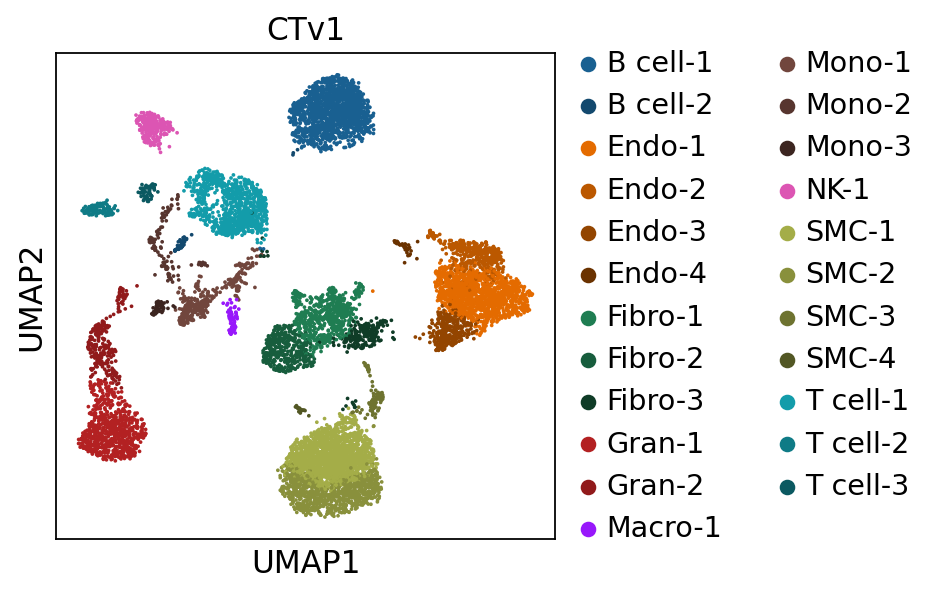

In [11]:
sc.pl.umap(adata0,color='CTv1')

In [2]:
adata0 = sc.read('./write/Deng_outer_processed.h5ad')

In [5]:
adata0.obs.CT_rough.cat.categories

Index(['B cell', 'Endo', 'Fibro', 'Gran', 'Macro', 'Mono', 'NK', 'SMC',
       'T cell'],
      dtype='object')

In [6]:
Immune = adata0[np.in1d(adata0.obs.CT_rough,
                        np.array(['B cell','T cell','Gran','Macro','Mono','NK']))]
NonImmune = adata0[np.in1d(adata0.obs.CT_rough,
                        np.array(['Endo','Fibro','SMC']))]

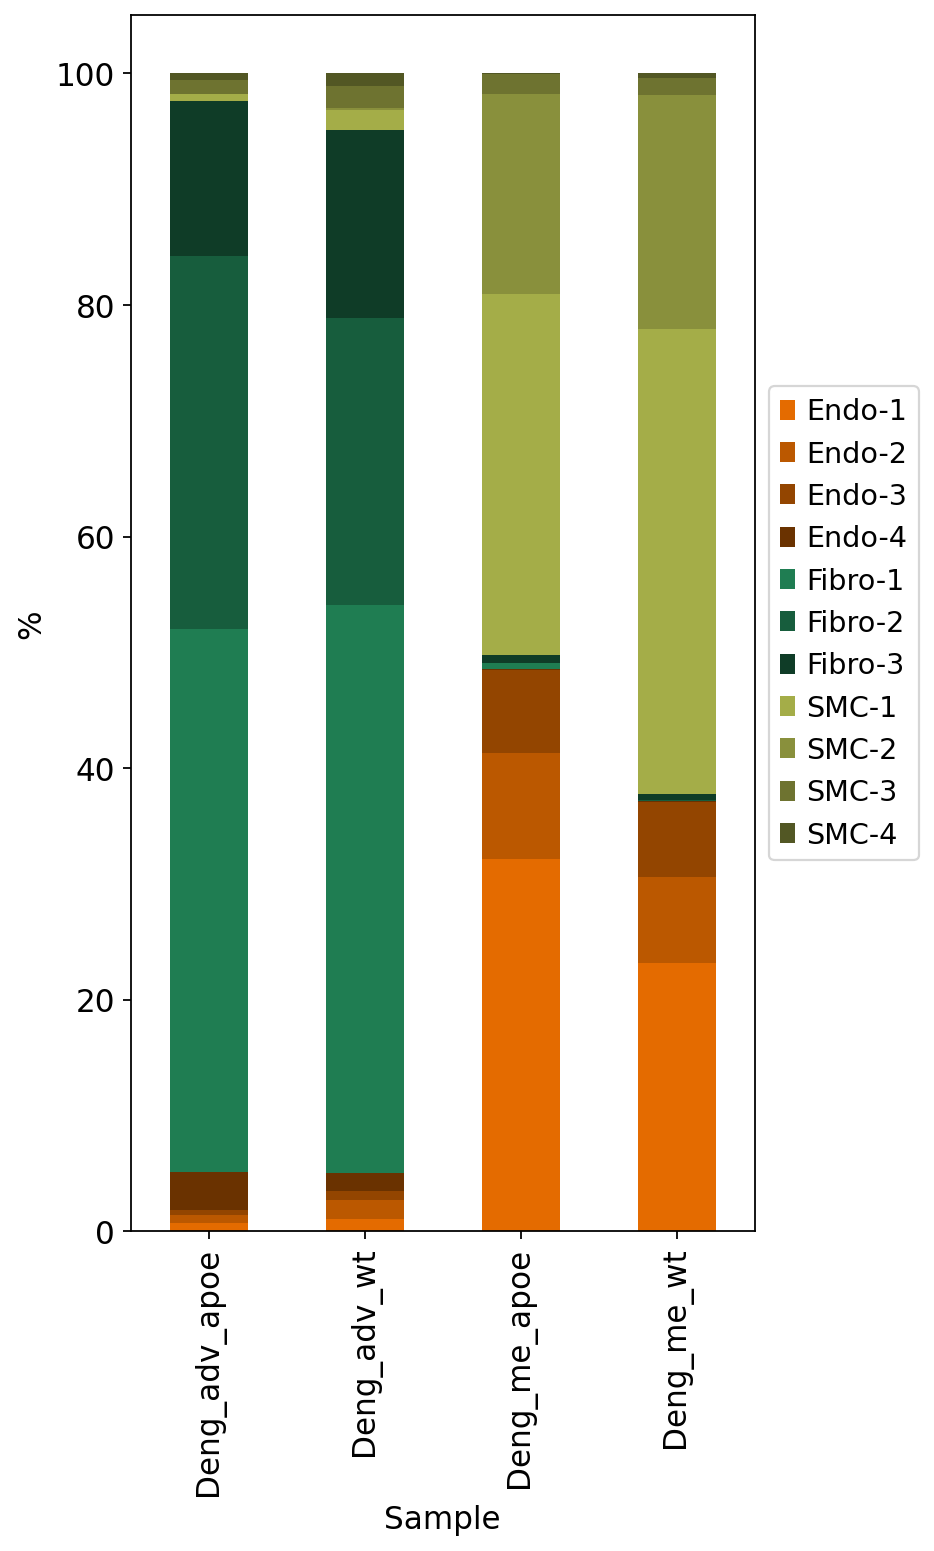

In [14]:
#adata = adata0[adata0.obs.Sample.str.startswith('Deng_adv')]
#adata = adata0
#plt.figure(figsize=(10,5))
samp = 'Nonimmune'
adata = Immune if samp=='Immune' else NonImmune
palette1 = ['#196091', '#13496e', 
            '#b32122', '#911a1b', '#9818fb',
       '#71463d', '#57352f', '#3c2520', '#dc55b3', 
            '#139caa', '#0f7b86', '#0b5961']
palette2 = ['#e46b00', '#bb5800', '#934500', '#6a3200',
       '#1f7d52', '#175d3d', '#0f3c27','#a4ad48', '#89903c',
       '#6e7330', '#525724']

tab = pd.crosstab(adata.obs['Sample'],adata.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True,
                  color=palette1 if samp=='Immune' else palette2
                 )
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig = plt.gcf()
fig.set_size_inches(5,10)

plt.savefig(f'./figures/Deng_CT_{samp}.png',bbox_inches='tight')
plt.savefig(f'./figures/Deng_CT_{samp}.pdf',bbox_inches='tight')

In [1001]:
tab2 = round(tab)

In [1007]:
tab2

CTv1,B cell-1,B cell-2,Endo-1,Endo-2,Endo-3,Endo-4,Fibro-1,Fibro-2,Fibro-3,Gran-1,...,Mono-2,Mono-3,NK-1,SMC-1,SMC-2,SMC-3,SMC-4,T cell-1,T cell-2,T cell-3
Sample,,,,,,,,,,,,,,,,,,,,,
Deng_adv_apoe,22.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,3.0,20.0,...,2.0,1.0,5.0,0.0,0.0,0.0,0.0,14.0,2.0,1.0
Deng_adv_wt,34.0,1.0,0.0,0.0,0.0,0.0,13.0,7.0,4.0,3.0,...,2.0,1.0,4.0,0.0,0.0,1.0,0.0,18.0,1.0,1.0
Deng_me_apoe,0.0,0.0,32.0,9.0,7.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,31.0,17.0,2.0,0.0,0.0,0.0,0.0
Deng_me_wt,0.0,0.0,23.0,7.0,6.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,40.0,20.0,1.0,0.0,0.0,0.0,0.0


In [20]:
cat_CTv1 = adata.obs.CTv1.cat.categories

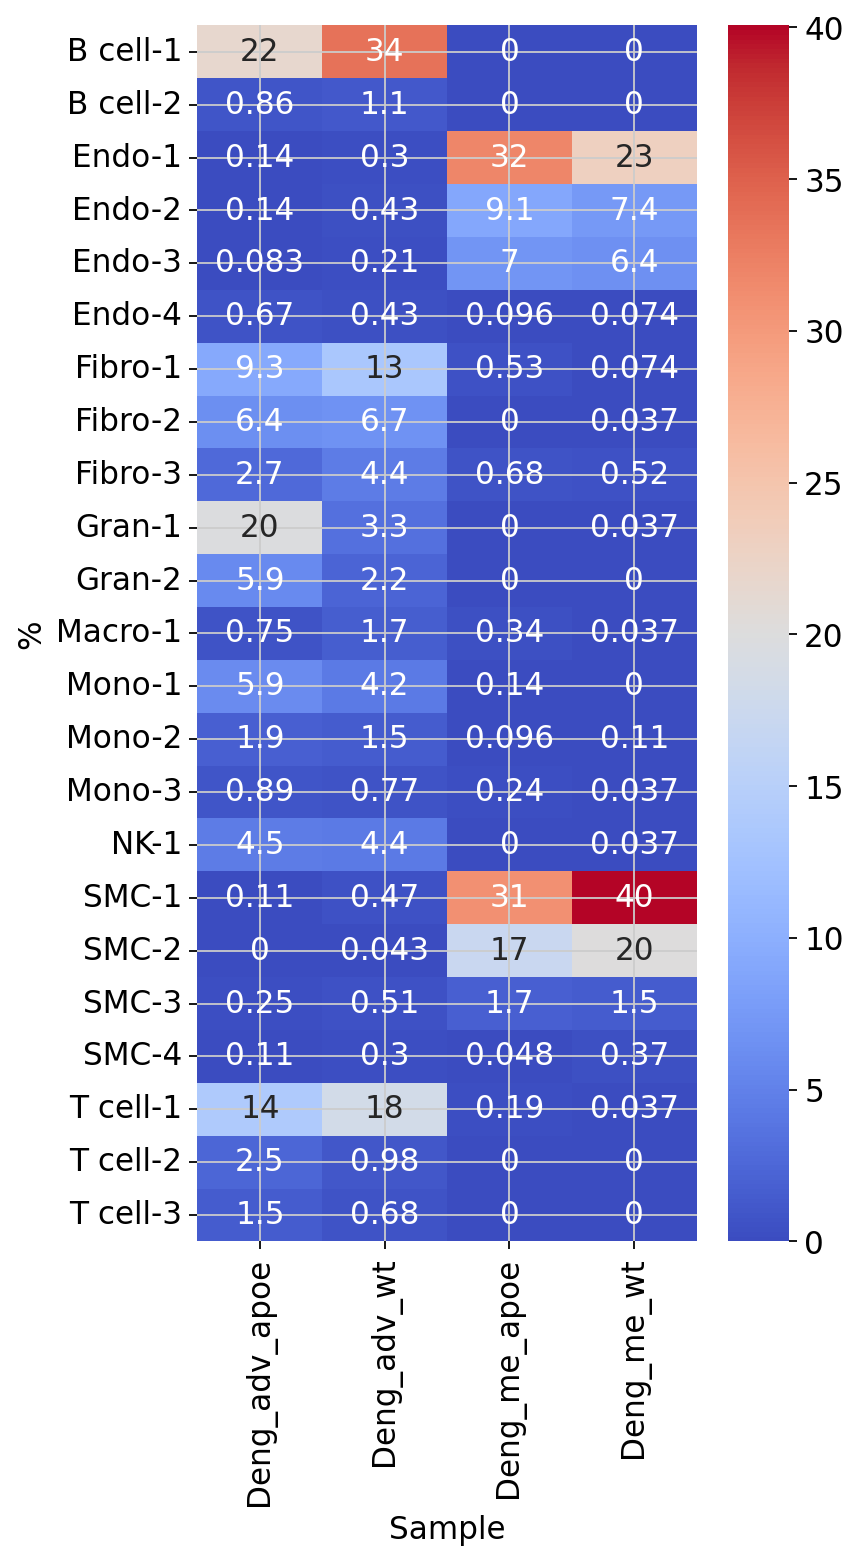

In [21]:
ax = sns.heatmap(tab.T,annot=True,cmap="coolwarm",
            yticklabels=cat_CTv1)
ax.set_ylabel('%')
fig = plt.gcf()
fig.set_size_inches(5,10)
plt.savefig('./figures/Deng_CT_htmap.png',bbox_inches='tight')
plt.savefig('./figures/Deng_CT_htmap.pdf',bbox_inches='tight')

In [ ]:
adata[adata0.obs.Sample.str.startswith('Deng_adv')]
tab = pd.crosstab(adata.obs['Sample'],adata.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True)
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Deng_CT_Immune.png',bbox_inches='tight'),

In [895]:
adata.obs.CTv1[adata.obs.CTv1.cat.str.startswith('Endo')]
adata1 = adata[Endoidx]
tab = pd.crosstab(adata1.obs['Sample'],adata1.obs['CTv1'], normalize=0)*100
ax = tab.plot.bar(stacked=True)
ax.grid(False)
ax.set_ylabel('%')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('CT_endo.png',bbox_inches='tight')

IndexError: Unknown indexer ['Endo-1', 'Endo-3', 'Endo-2', 'Endo-3', 'Endo-3', ..., 'Endo-3', 'Endo-1', 'Endo-3', 'Endo-2', 'Endo-4']
Length: 2060
Categories (23, object): ['B cell-1', 'B cell-2', 'Endo-1', 'Endo-2', ..., 'SMC-4', 'T cell-1', 'T cell-2', 'T cell-3'] of type <class 'pandas.core.arrays.categorical.Categorical'>

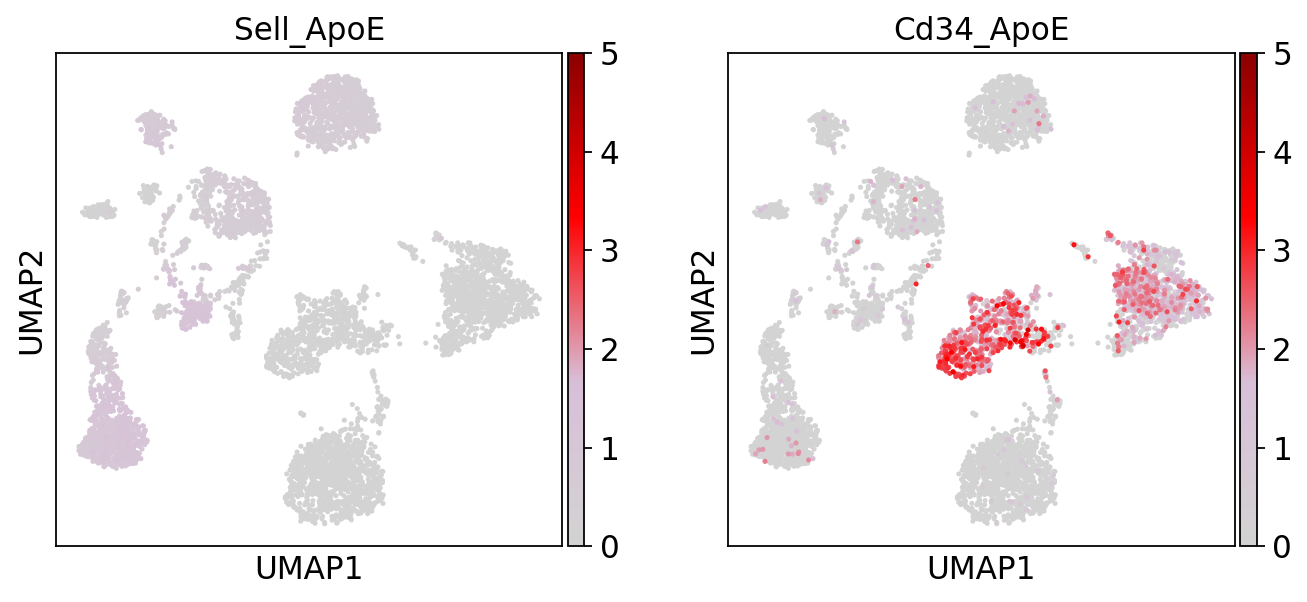

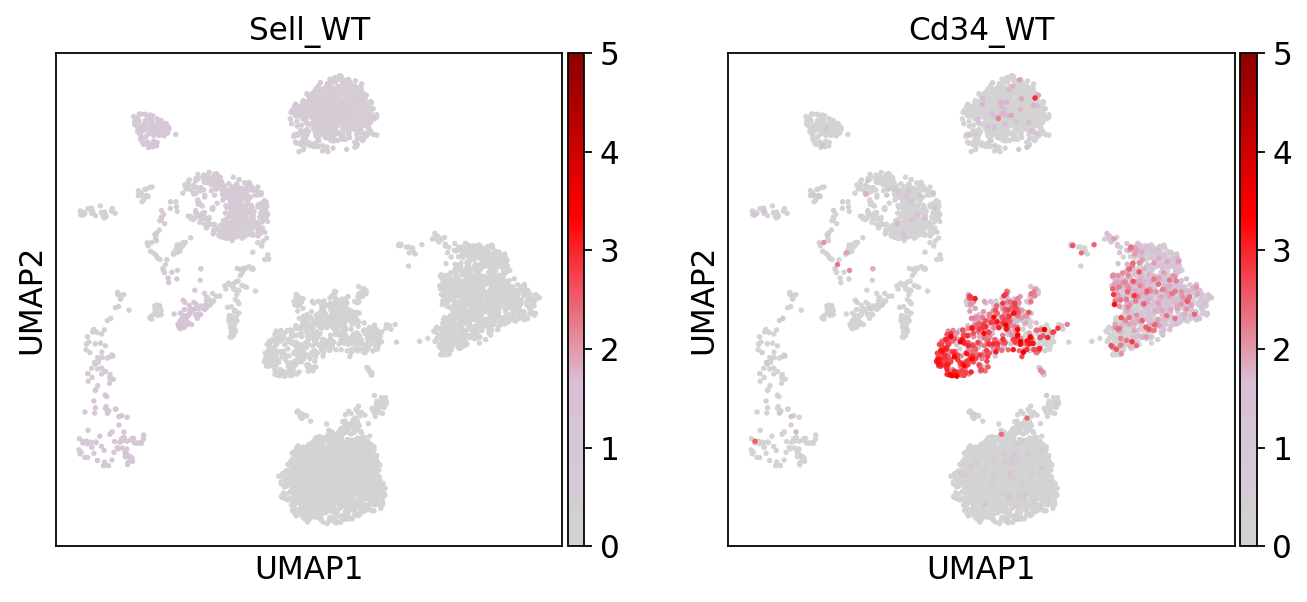

In [1133]:
GTs = ['ApoE','WT']
gl = ['Sell','Cd34']
for GT in GTs:
    sc.pl.umap(adata[adata.obs.Genotype==GT], color=gl,legend_loc='on data',cmap=cmap,
               vmin=0,vmax=5,vcenter=2.5,
          #title=[f"{gl[0]}_{GT}",f"{gl[1]}_{GT}",f"{gl[2]}_{GT}"],
          title=[f"{gl[0]}_{GT}",f"{gl[1]}_{GT}"],
          save=f"_Deng_Markers_{gl[0]}_{gl[1]}_{GT}.png"
          )

In [1074]:
adata

AnnData object with n_obs × n_vars = 10695 × 8846
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'phase', 'S_score', 'G2M_score', 'Age', 'Genotype', 'CellType', 'StudyID', 'Tissue', 'Sample', 'doublet', 'dbscore', 'n_genes', 'batch', 'Leiden_v1', 'CTv1', 'CT_rough', 'GT_CT'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3

<Figure size 320x320 with 0 Axes>

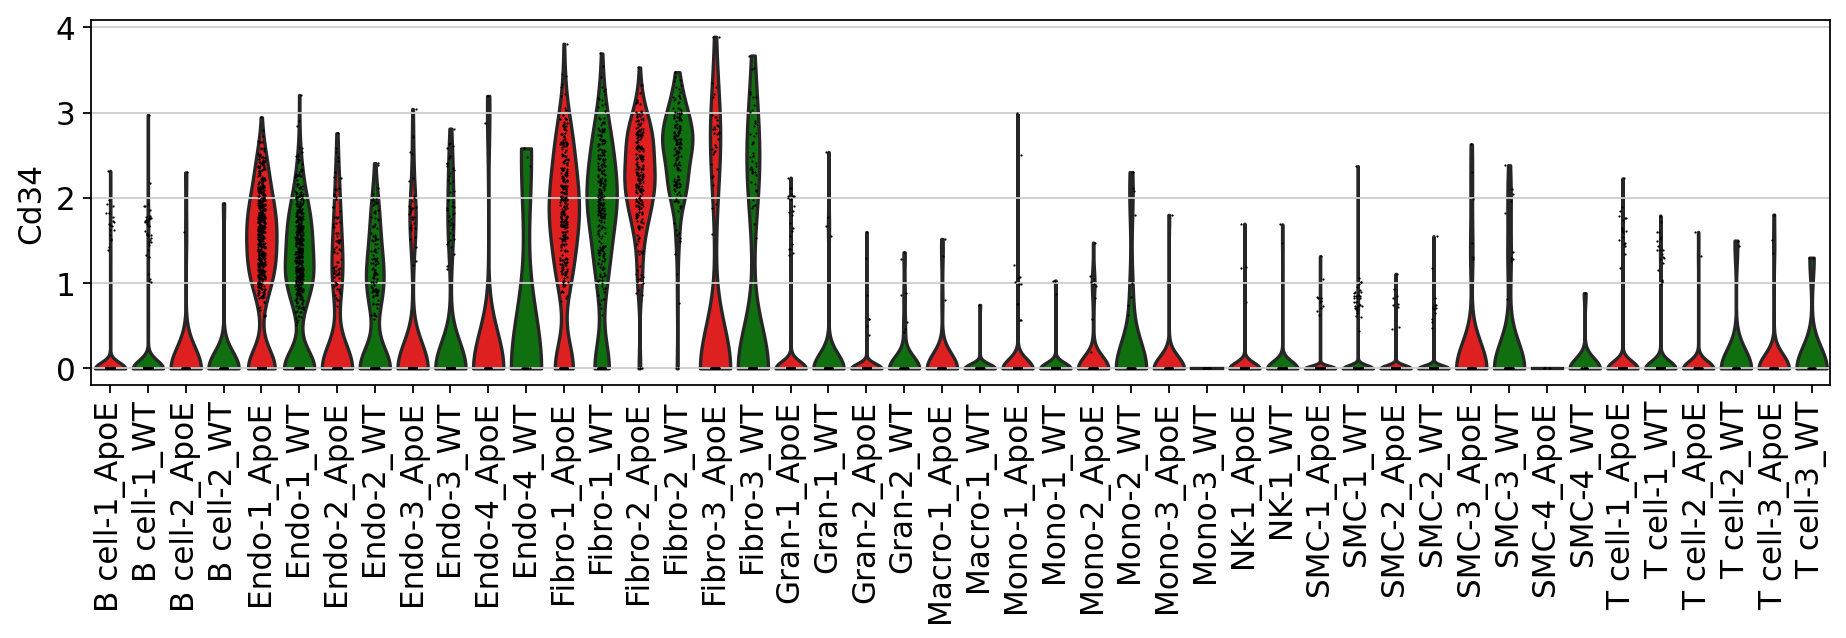

In [1130]:
key = 'Cd34'
adata.obs['GT_CT'] = adata.obs['CTv1'].astype('str')+'_'+adata.obs['Genotype'].astype('str')
plt.figure()
sc.pl.violin(adata,keys=[key],groupby='GT_CT',show=False,rotation=90,
            palette=['red','green']*len(adata.obs.CTv1.cat.categories))
fig = plt.gcf()
fig.set_size_inches(18,3)
plt.savefig(f'./figures/Deng_{key}.png',bbox_inches='tight')
plt.savefig(f'./Files/pdf_backup/Deng_{key}.pdf',bbox_inches='tight')

In [1061]:
Subs = 'B cell'
adata1 = adata0[adata0.obs['CT_rough']==Subs]
# Subs = 'Endo-4'
# adata1 = adata0[adata0.obs['CTv1']==Subs]
sc.tl.rank_genes_groups(adata1,groupby='Genotype',key_added='DE_geno')
result = adata1.uns['DE_geno']
groups = result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals_adj']})
df.to_csv(f'./Files/Deng_de_geno_{Subs}.csv')

ranking genes


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


    finished: added to `.uns['DE_geno']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [550]:
adata.write('./write/Deng_outer_processed.h5ad')

# Seurat Conversion

In [25]:
import anndata2ri
import anndata
import scipy as sp

In [26]:
anndata2ri.activate()
%load_ext rpy2.ipython

In [587]:
adata = sc.read('./write/Deng_outer_processed.h5ad')

In [588]:
adata.var.to_csv('./Files/Deng_outer_var.csv')
adata.obs.to_csv('./Files/Deng_outer_obs.csv')

In [574]:
#adata = anndata.AnnData(X=adata.raw.X,var=adata.raw.var,obs=adata.obs)
adata = anndata.AnnData(X=adata.raw.X,var=adata.raw.var,obs=adata.obs)

In [580]:
adata.var = pd.DataFrame(adata.var.index,index=adata.var.index)
adata.obs = pd.DataFrame(adata.obs.index,index=adata.obs.index)

In [581]:
adata.var = adata.var.drop(columns='gene_symbol')
adata.obs = adata.obs.drop(columns='barcode')

In [586]:
adata.write('./write/Deng_outer.rawcnts.h5ad')

In [47]:
%%R
library(Seurat)
library(SeuratDisk)

In [48]:
%%R
Convert("./write/Deng_outer.rawcnts.h5ad", dest = "h5seurat", overwrite = TRUE)

R[write to console]: Warning:
R[write to console]:  Unknown file type: h5ad

R[write to console]: Warning:
R[write to console]:  'assay' not set, setting to 'RNA'

R[write to console]: Creating h5Seurat file for version 3.1.5.9900

R[write to console]: Adding X as data

R[write to console]: Adding X as counts

R[write to console]: Adding meta.features from var



In [49]:
%%R
adata = LoadH5Seurat("./write/Deng_outer.rawcnts.h5seurat")

R[write to console]: Validating h5Seurat file

R[write to console]: Initializing RNA with data

R[write to console]: Adding counts for RNA

R[write to console]: Adding feature-level metadata for RNA

R[write to console]: Warning:
R[write to console]:  None of the columns specified by 'colnames' are present

R[write to console]: Adding command information

R[write to console]: Adding cell-level metadata

R[write to console]: Adding miscellaneous information

R[write to console]: Adding tool-specific results



In [50]:
%%R
adata.obs = read.csv("./write/Deng_outer_obs.csv", row.names=1)
adata = CreateSeuratObject(counts=adata[['RNA']]@counts,meta.data=adata.obs)

In [51]:
%%R
adata

An object of class Seurat 
18166 features across 24001 samples within 1 assay 
Active assay: RNA (18166 features, 0 variable features)
 2 layers present: counts, data


In [52]:
%%R
head(colnames(adata))

[1] "AAACCTGAGAGGTTAT-1_1" "AAACCTGAGCTCCTCT-1_1" "AAACCTGAGTCGATAA-1_1"
[4] "AAACCTGCACATGACT-1_1" "AAACCTGCACGCGAAA-1_1" "AAACCTGCAGAGTGTG-1_1"


In [53]:
%%R
adata[['RNA']]

Assay data with 18166 features for 24001 cells
First 10 features:
 Xkr4, Sox17, Mrpl15, Lypla1, Tcea1, Rgs20, Atp6v1h, Rb1cc1,
4732440D04Rik, Pcmtd1 


In [55]:
%%R
colnames(adata@meta.data)

 [1] "orig.ident"                  "n_genes_by_counts"          
 [3] "log1p_n_genes_by_counts"     "total_counts"               
 [5] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
 [7] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
 [9] "pct_counts_in_top_500_genes" "total_counts_MT"            
[11] "log1p_total_counts_MT"       "pct_counts_MT"              
[13] "n_counts"                    "group"                      
[15] "group.1"                     "group.2"                    
[17] "group.3"                     "group.4"                    
[19] "group.5"                     "group.6"                    
[21] "group.7"                     "group.8"                    
[23] "group.9"                     "group.10"                   
[25] "group.11"                    "group.12"                   
[27] "phase"                       "S_score"                    
[29] "G2M_score"                   "Day"                        
[31] "Age"               

In [56]:
%%R
saveRDS(adata,'./write/Deng_outer.rds')